In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\shukl\Downloads\Diwali Sales Data.csv",encoding='unicode_escape')

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [4]:
df = data.copy()

In [5]:
df.shape

(11345, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [7]:
null_values = df.isna().sum()
null_values

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [8]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

User_ID               0.211547
Cust_name             0.008814
Product_ID            0.035258
Gender                0.035258
Age Group             0.052887
Age                   0.096959
Marital_Status        0.052887
State                 0.114588
Zone                  0.096959
Occupation            0.052887
Product_Category      0.096959
Orders                0.026443
Amount                0.123402
Status              100.000000
unnamed1            100.000000
dtype: float64

In [9]:
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
User_ID,24,0.211547
Cust_name,1,0.008814
Product_ID,4,0.035258
Gender,4,0.035258
Age Group,6,0.052887
Age,11,0.096959
Marital_Status,6,0.052887
State,13,0.114588
Zone,11,0.096959
Occupation,6,0.052887


In [10]:
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [11]:
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [12]:
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [14]:
df = df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


# Data Cleaning

In [15]:
df.drop(['Status', 'unnamed1'],axis =1, inplace = True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


In [16]:
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')

In [17]:
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

In [18]:
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh',  'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh',  'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral',  'Central')

In [19]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [20]:
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)

In [21]:
df['marraige_status'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==1.) else 'Unmarried')

In [22]:
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')

In [23]:
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

In [24]:
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)

In [25]:
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]

df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  marraige_status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [27]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

# Outlier Detection & Removal

In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 1.0, "Box plot for 'Amount'")

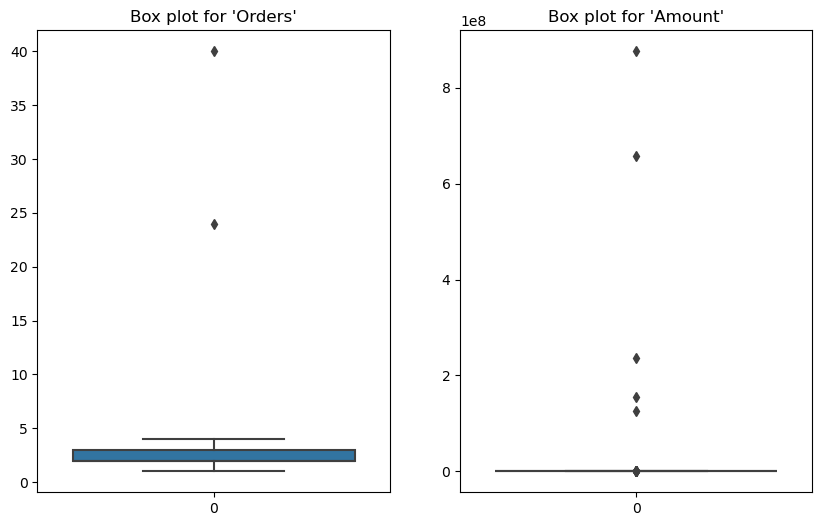

In [29]:
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")

In [30]:
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [31]:
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]

In [32]:
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [33]:
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]

In [34]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


In [35]:
df.to_csv(r"C:\Users\shukl\Downloads\Diw_clean.csv")

# Exploratory Data Analysis

## Statistical Analysis

In [36]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [37]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


# Data Visualization

## Gender Wise Analysis

In [38]:
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender wise order count \n", data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender wise Purchase Power \n", data_gender_amount)

Gender wise order count 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise Purchase Power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


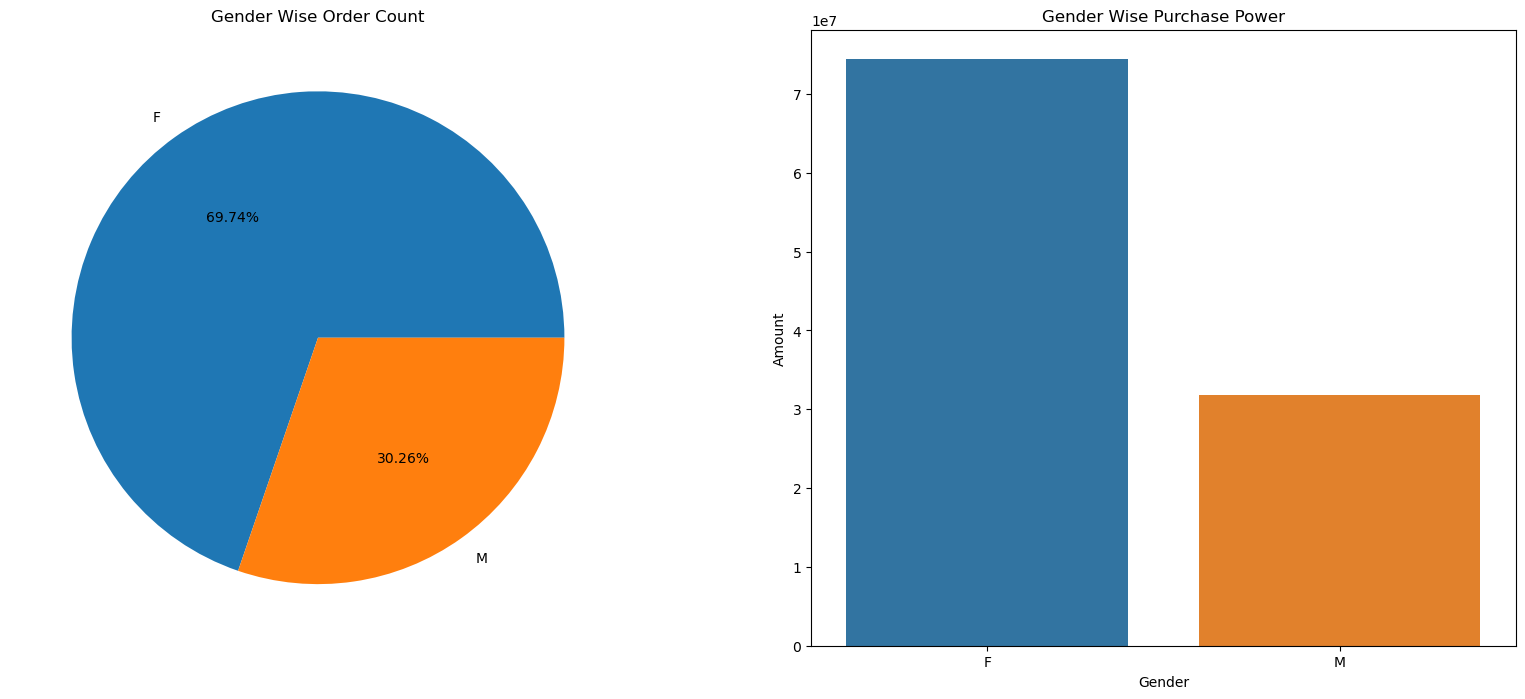

In [39]:
# Plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))

# Pie Chart
ax[0].pie(x = data_gender_count['Orders'],labels = data_gender_count['Gender'], autopct = "%1.2f%%")
ax[0].set_title("Gender Wise Order Count")

# Bar Chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender Wise Purchase Power")
plt.show()

## Conclusion
### The number of order placed by female customer is higher

## Marital Status wise Analysis

In [40]:
data_marraige_status_amount = df.groupby(['marraige_status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,marraige_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


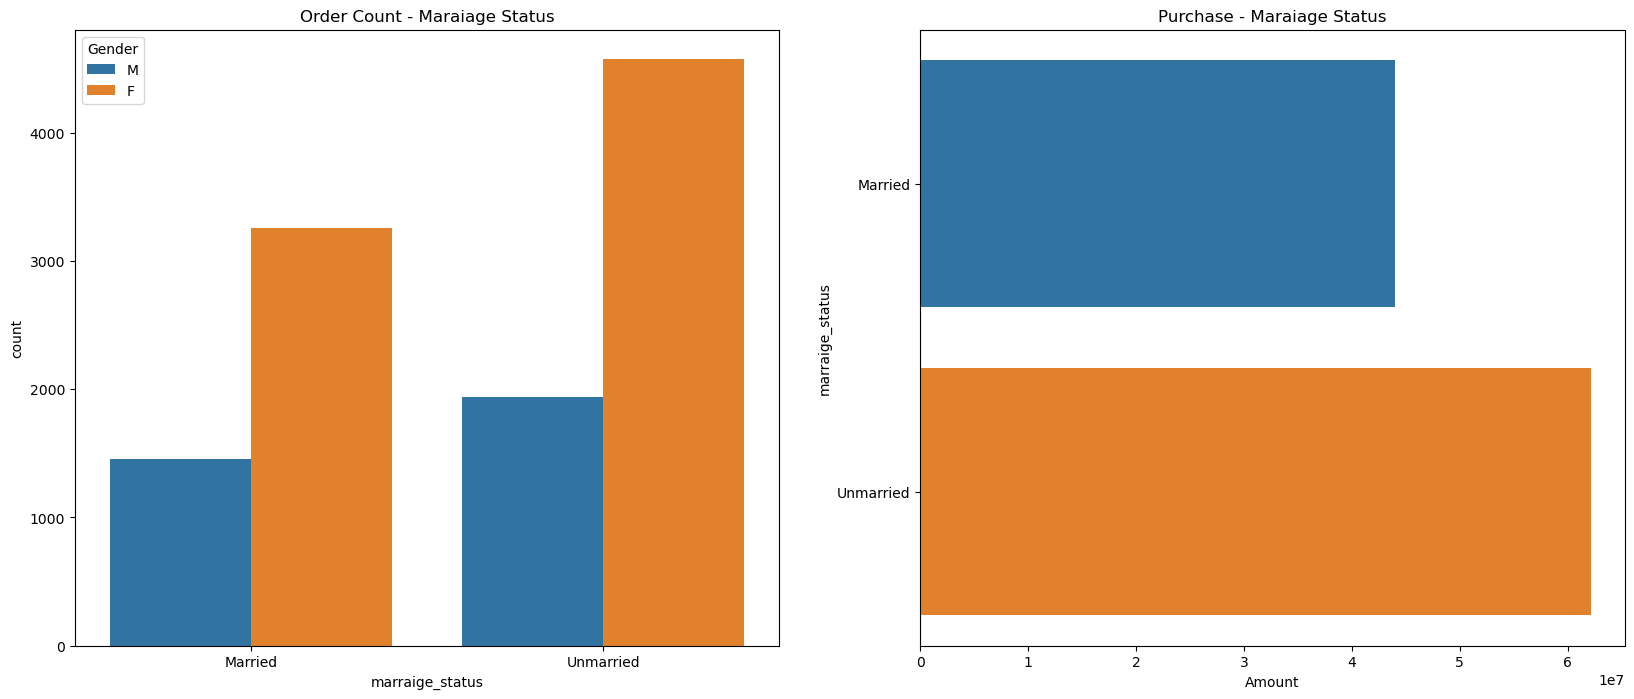

In [41]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'marraige_status', hue = 'Gender', data = df, ax = ax[0])
ax[0].set_title('Order Count - Maraiage Status')

# Barplot for purchase power
sns.barplot(y = 'marraige_status', x = 'Amount', orient = 'h',data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Maraiage Status')

plt.show()

## Conclusion
### The number of order placed by unmarried female is greater then married female and unmarried male

In [42]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


## Age Group wise Analysis

In [43]:
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount = data_age_group_amount.sort_values(by='Amount', ascending=False)
data_age_group_amount

,Age Group,Amount
2,26-35,42603794.95
3,36-45,22234332.99
1,18-25,17032196.00
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00
0,0-17,2696529.00


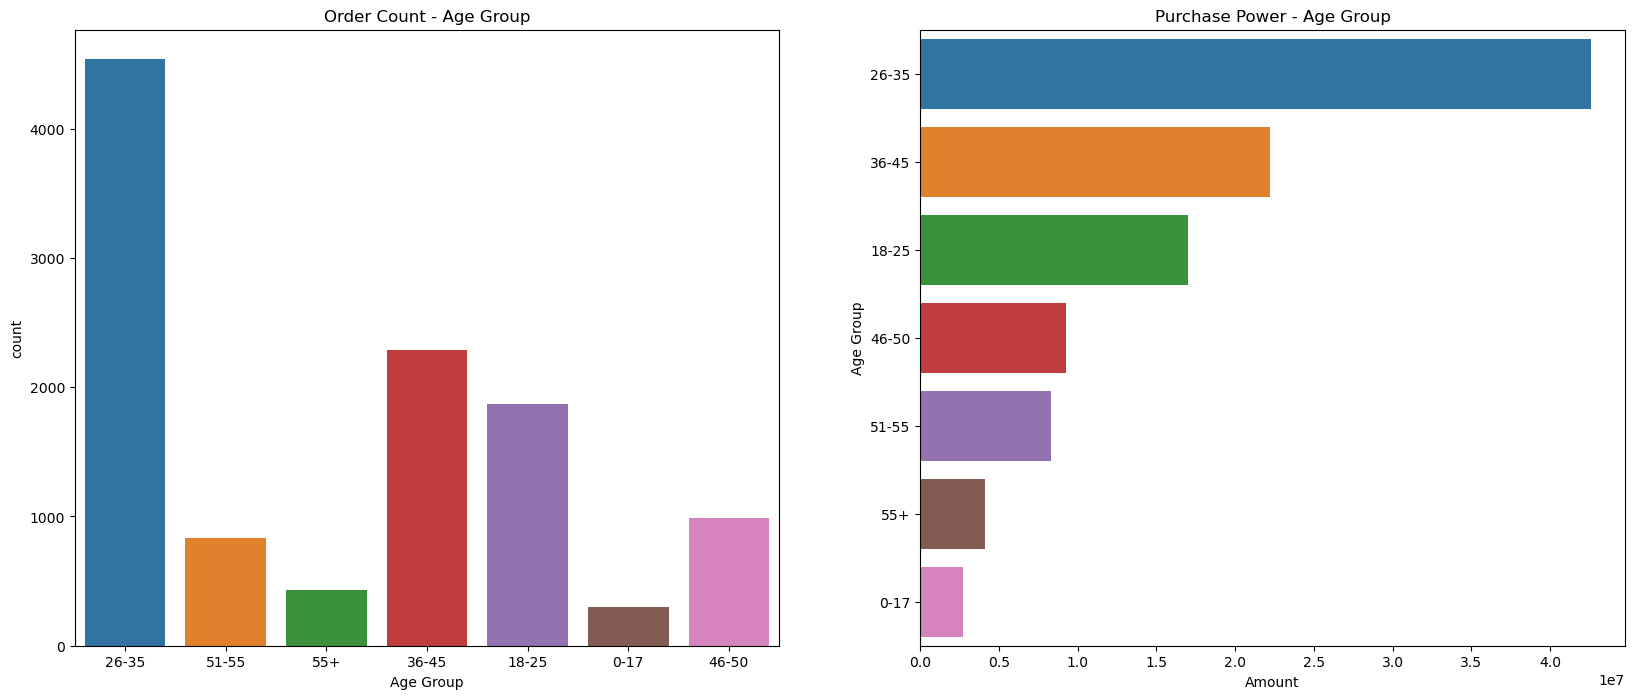

In [44]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'Age Group', data = df, ax = ax[0])
ax[0].set_title('Order Count - Age Group')

# Barplot for purchase power
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',data = data_age_group_amount, ax = ax[1])
ax[1].set_title('Purchase Power - Age Group')

plt.show()

## Conclusion
### The people in the age group of 26-35 placed more orders

## Product Category wise Analysis

In [48]:
data_product_category_amount = df.groupby(['Product_Category'], as_index=False)['Amount'].sum()
data_product_category_amount = data_product_category_amount.sort_values(by='Amount', ascending=False).head(5)
data_product_category_amount

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99


Text(0.5, 1.0, 'Purchase Power - Top 5 Product Categories')

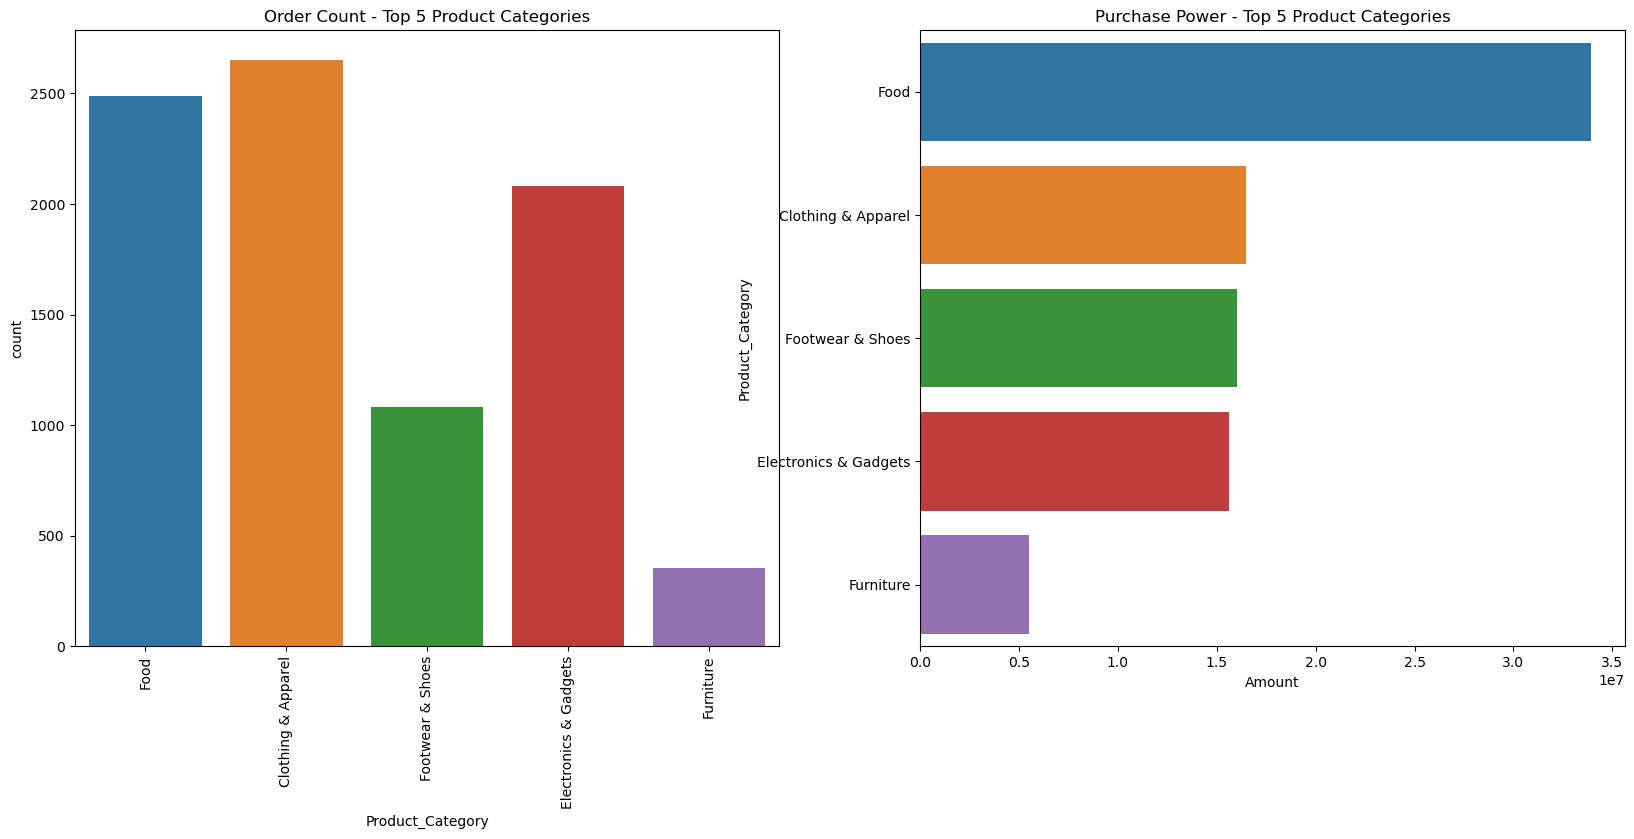

In [51]:
top_5_categories_ordered = data_product_category_amount['Product_Category']
df_top_5 = df[df['Product_Category'].isin(top_5_categories_ordered)]

#plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

#countplot
sns.countplot(x='Product_Category', data=df_top_5, ax=ax[0], order=top_5_categories_ordered)
ax[0].set_title('Order Count - Top 5 Product Categories')
ax[0].tick_params(axis='x', rotation=90)

#barplot for purchase power
sns.barplot(y='Product_Category', x='Amount', orient='h', data=data_product_category_amount, ax=ax[1])
ax[1].set_title('Purchase Power - Top 5 Product Categories')

## Conclusion:
### Clothing & Apparel and Food are ordered more frequently, while food generates the highest revenue

## State wise Analysis

In [52]:
data_state_amount = df.groupby(['State'], as_index=False)['Amount'].sum()
data_state_amount = data_state_amount.sort_values(by='Amount', ascending=False)
data_state_amount

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00
0,Andhra Pradesh,7894002.00
5,Himachal Pradesh,4939491.00
4,Haryana,4196308.00
1,Bihar,4035457.00
3,Gujarat,3935078.00


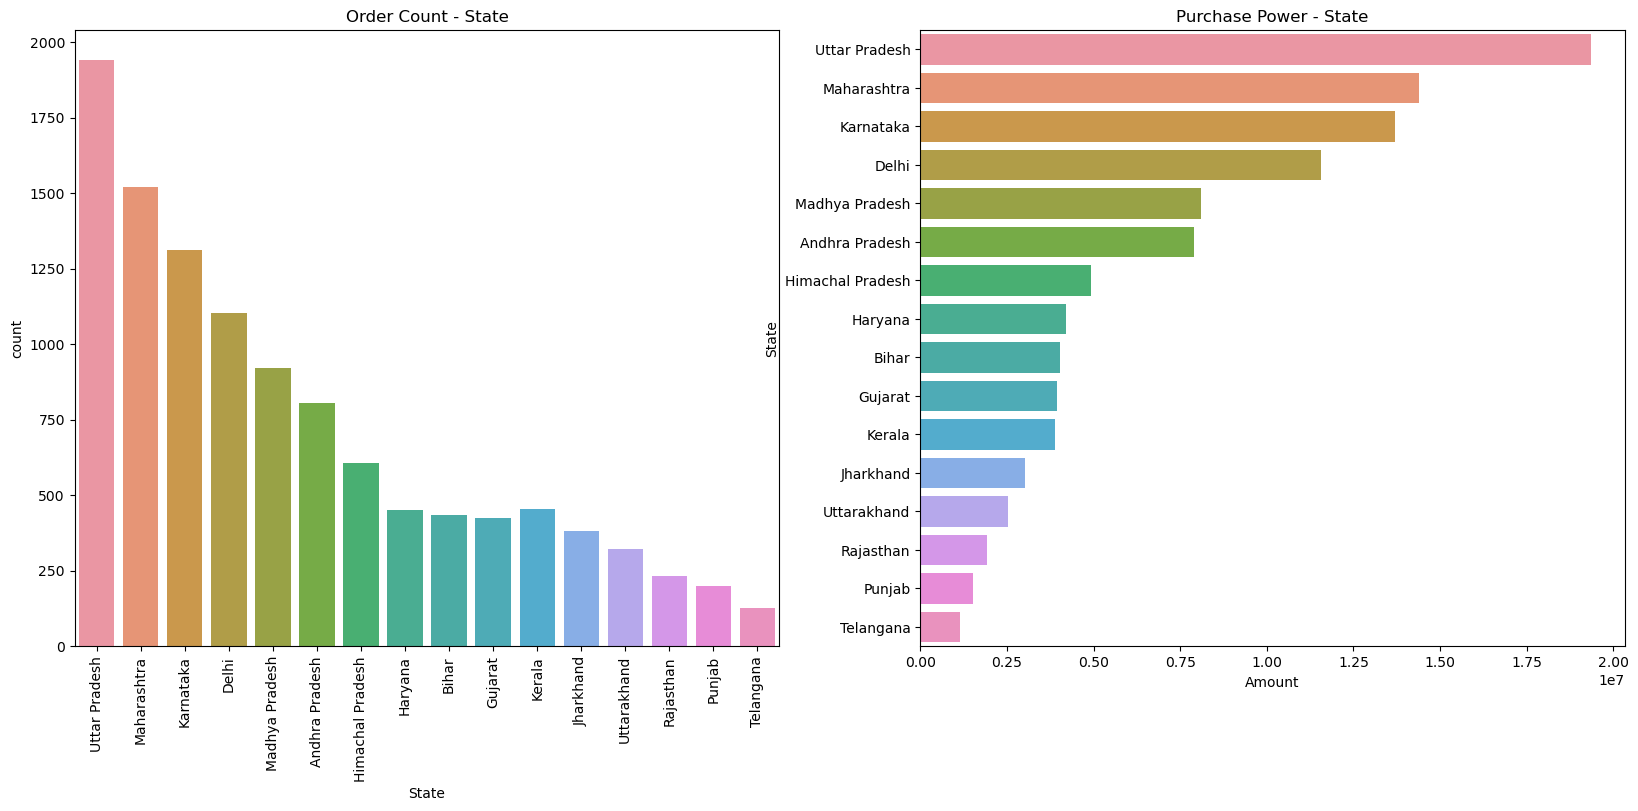

In [53]:
sorted = data_state_amount['State']

#plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

#countplots
sns.countplot(x='State', data=df, ax=ax[0], order=sorted)
ax[0].set_title('Order Count - State')
ax[0].tick_params(axis='x', rotation=90)

#barplot for purchase power
sns.barplot(y='State', x='Amount', orient='h', data=data_state_amount, ax=ax[1])
ax[1].set_title('Purchase Power - State')


plt.show()

## Conclusion
### Number of orders placed by Uttar Pradesh is highest.

## Product_Id wise Analysis

In [54]:
data_product_id_amount = df.groupby(['Product_ID'], as_index = False)['Amount'].sum()
data_product_id_amount

,Product_ID,Amount
0,P00000142,248716.0
1,P00000242,57517.0
2,P00000342,44963.0
3,P00000442,12292.0
4,P00000542,18837.0
...,...,...
2344,P0099042,49596.0
2345,P0099242,64578.0
2346,P0099342,56982.0
2347,P0099442,45810.0


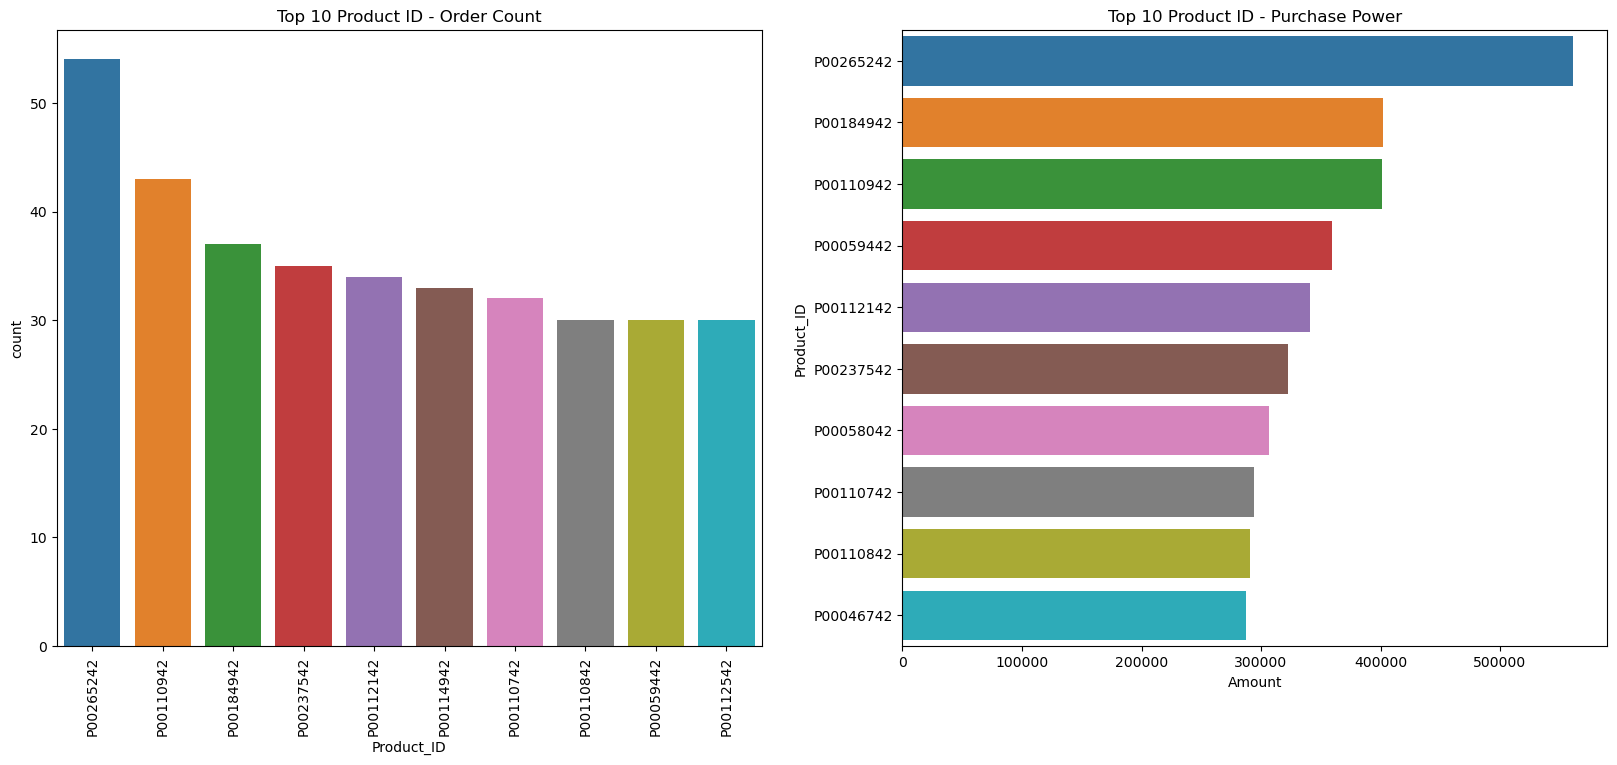

In [55]:
# Plots
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

# Countplot
sns.countplot(x = 'Product_ID', data = df, order=df['Product_ID'].value_counts().index[:10], ax = ax[0])
ax[0].set_title('Top 10 Product ID - Order Count')
ax[0].tick_params(axis='x', rotation=90)

# Barplot for purchase power
top_10_product_ids = data_product_id_amount.nlargest(10, 'Amount')
sns.barplot(y = 'Product_ID', x = 'Amount', orient = 'h', data = top_10_product_ids, ax = ax[1])
ax[1].set_title('Top 10 Product ID - Purchase Power')

plt.show()

## Conclusion
### Product_ID P00265242 is more frequently placed

## Occupation wise anaysis

In [56]:
data_occupation_amount = df.groupby(['Occupation'], as_index=False)['Amount'].sum()
data_occupation_amount = data_occupation_amount.sort_values(by='Amount', ascending=False)
data_occupation_amount

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
7,Govt,8425182.00
9,Hospitality,6402793.00
12,Media,6291535.00
1,Automobile,5362757.00
4,Chemical,5297100.00
11,Lawyer,4977574.00


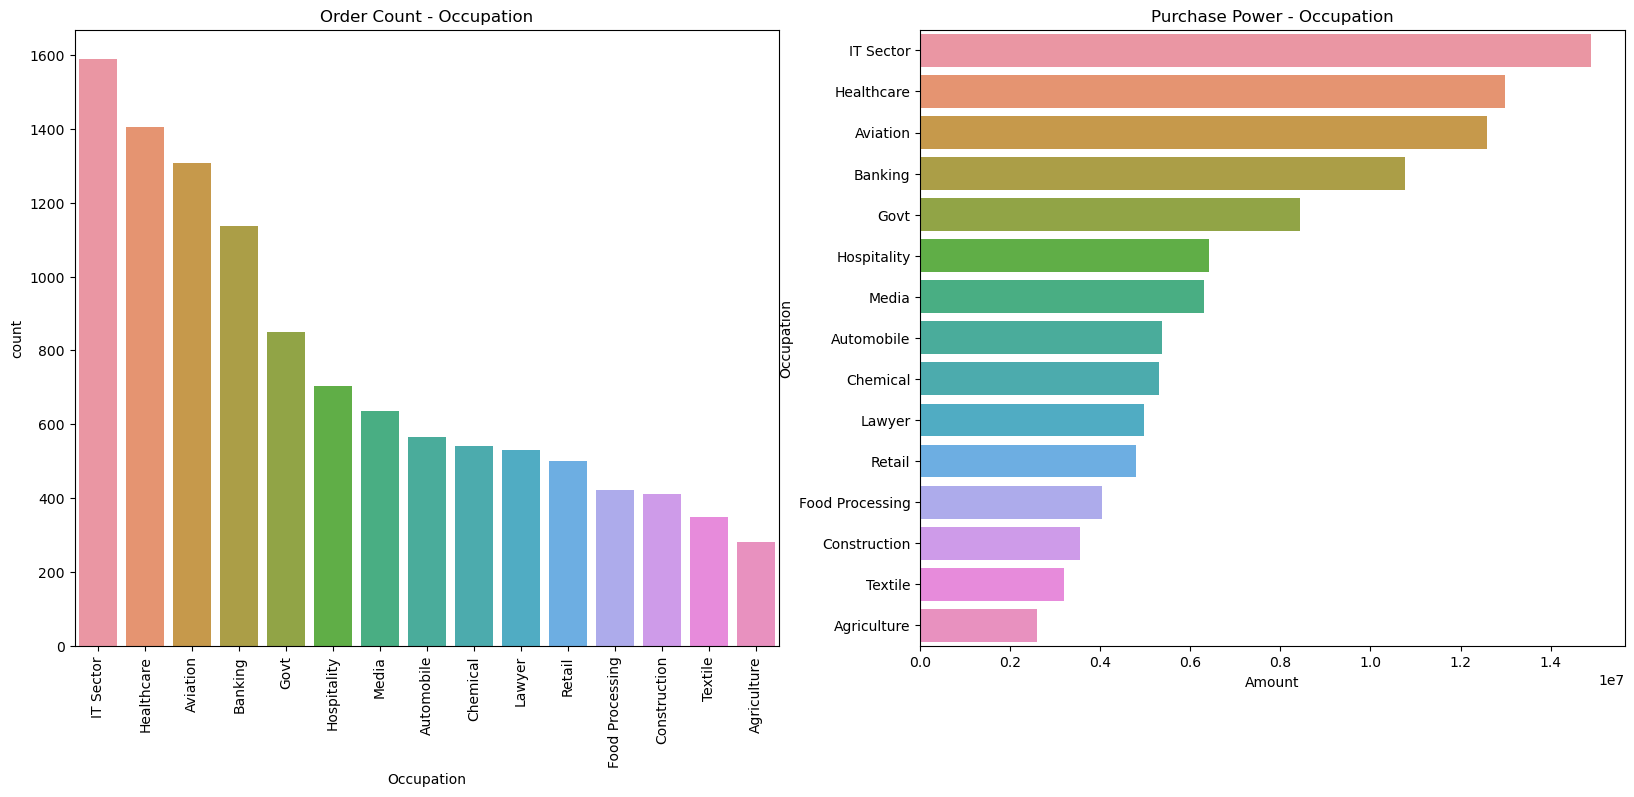

In [57]:
ocsorted = data_occupation_amount['Occupation']

#plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

#countplots
sns.countplot(x='Occupation', data=df, ax=ax[0], order=ocsorted)
ax[0].set_title('Order Count - Occupation')
ax[0].tick_params(axis='x', rotation=90)

#barplot for purchase power
sns.barplot(y='Occupation', x='Amount', orient='h', data=data_occupation_amount, ax=ax[1], order=ocsorted)
ax[1].set_title('Purchase Power - Occupation')

plt.show()

## Conclusion
### IT Sector occupation group places the most orders